In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sample_data = pd.read_csv('diabetes2.csv')
sample_data.fillna(0,inplace=True)

train_data = sample_data.sample(frac=0.8,random_state=0)
train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1
122,2,107,74,30,100,33.6,0.404,23,0
113,4,76,62,0,0,34.0,0.391,25,0
14,5,166,72,19,175,25.8,0.587,51,1
529,0,111,65,0,0,24.6,0.660,31,0


In [3]:
test_data = sample_data.drop(train_data.index)
test_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
11,10,168,74,0,0,38.0,0.537,34,1
19,1,115,70,30,96,34.6,0.529,32,1
23,9,119,80,35,0,29.0,0.263,29,1
28,13,145,82,19,110,22.2,0.245,57,0


In [4]:
train_data.reset_index(inplace=True,drop=True)
train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,199,76,43,0,42.9,1.394,22,1
1,2,107,74,30,100,33.6,0.404,23,0
2,4,76,62,0,0,34.0,0.391,25,0
3,5,166,72,19,175,25.8,0.587,51,1
4,0,111,65,0,0,24.6,0.660,31,0


In [5]:
test_data.reset_index(inplace=True,drop=True)
test_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,8,125,96,0,0,0.0,0.232,54,1
1,10,168,74,0,0,38.0,0.537,34,1
2,1,115,70,30,96,34.6,0.529,32,1
3,9,119,80,35,0,29.0,0.263,29,1
4,13,145,82,19,110,22.2,0.245,57,0


In [7]:
train_label = np.array(train_data['Outcome'])
train_label.shape = (train_label.shape[0],1)

In [8]:
train = train_data.drop(columns=['Outcome'])
train = np.array(train)
train = train / np.linalg.norm(train)
print(train.shape)
print(train)

(614, 8)
[[1.93694058e-04 3.85451175e-02 1.47207484e-02 ... 8.30947508e-03
  2.70009517e-04 4.26126927e-03]
 [3.87388116e-04 2.07252642e-02 1.43333603e-02 ... 6.50812034e-03
  7.82523994e-05 4.45496333e-03]
 [7.74776231e-04 1.47207484e-02 1.20090316e-02 ... 6.58559797e-03
  7.57343766e-05 4.84235145e-03]
 ...
 [3.87388116e-04 1.74324652e-02 1.35585840e-02 ... 5.28784778e-03
  1.64639949e-05 4.26126927e-03]
 [1.74324652e-03 3.02162730e-02 1.66576890e-02 ... 6.64370618e-03
  2.30302235e-04 8.13515043e-03]
 [0.00000000e+00 2.26622048e-02 1.27838078e-02 ... 5.96577698e-03
  9.54911705e-05 4.26126927e-03]]


In [9]:
test_label = np.array(test_data['Outcome'])
test_label.shape = (test_label.shape[0],1)

In [10]:
test = test_data.drop(columns=['Outcome'])
test = np.array(test)
test = test/np.linalg.norm(test)
print(test.shape)
print(test)

(154, 8)
[[3.08732479e-03 4.82394499e-02 3.70478975e-02 ... 0.00000000e+00
  8.95324190e-05 2.08394424e-02]
 [3.85915599e-03 6.48338207e-02 2.85577543e-02 ... 1.46647928e-02
  2.07236677e-04 1.31211304e-02]
 [3.85915599e-04 4.43802939e-02 2.70140919e-02 ... 1.33526797e-02
  2.04149352e-04 1.23492992e-02]
 ...
 [3.08732479e-03 5.94310023e-02 3.01014167e-02 ... 1.25036654e-02
  1.70960610e-04 1.73662020e-02]
 [2.31549359e-03 7.33239638e-02 3.55042351e-02 ... 1.37000038e-02
  1.07284537e-04 2.54704295e-02]
 [3.85915599e-03 3.89774755e-02 2.93295855e-02 ... 1.26966232e-02
  6.59915675e-05 2.43126827e-02]]


In [11]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def loss(output,label):
    result = label*np.log(output) + (1-label)*np.log(1-output)
    return -np.sum(result,axis=0)

In [19]:
W = np.random.normal(scale=1 / 5 ** .5, size=(train.shape[1], 1))
print(W)
lr = 0.02
train_loss = []
test_loss = []
train_correct = []
test_correct = []
# keeping number of epochs less for time constraints
for i in range(500000):
    train_output = sigmoid(train @ W)
    # print(train_output)
    train_pred = train_output>0.5
    train_correct.append(np.mean(train_pred==train_label))
    train_loss.append(loss(train_output,train_label))

    test_output = sigmoid(test @ W)
    # print(test_output)
    test_pred = test_output>0.5
    test_correct.append(np.mean(test_pred==test_label))
    test_loss.append(loss(test_output,test_label))

    # Update weight
    dW = 1/(train.shape[0]) * (train.T @ (train_output-train_label))
    W = W - lr*dW

[[-0.89451794]
 [ 0.47478191]
 [ 0.6757941 ]
 [-0.60634545]
 [ 0.41676292]
 [ 0.24385995]
 [ 0.76851229]
 [-0.71659869]]


Final Training Correctness 64.33%
Final Test Correctness 68.18%


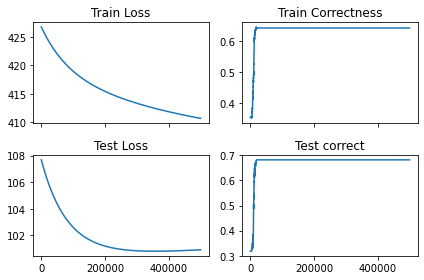

In [22]:
print("Final Training Correctness {:.2f}%".format(train_correct[-1]*100))
print("Final Test Correctness {:.2f}%".format(test_correct[-1]*100))
fig,ax = plt.subplots(2,2,sharex=True)
ax[0][0].plot(train_loss)
ax[0][0].set_title('Train Loss')
ax[0][1].plot(train_correct)
ax[0][1].set_title('Train Correctness')

ax[1][0].plot(test_loss)
ax[1][0].set_title('Test Loss')
ax[1][1].plot(test_correct)
ax[1][1].set_title('Test correct')
fig.tight_layout()

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [24]:
p_train = torch.from_numpy(train).float()
p_train.size()
p_train_label = torch.from_numpy(train_label).float()
p_test = torch.from_numpy(test).float()
p_test_label = torch.from_numpy(test_label).float()

<ipython-input-28-3ee1a1c39247>:6: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(m.weight.data)


Final Training Correctness 64.33%
Final Test Correctness 68.18%


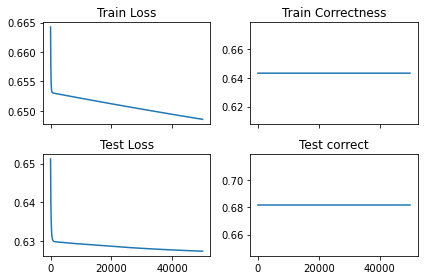

In [28]:
model = nn.Sequential(nn.Linear(8,1),
                      nn.Sigmoid())

def weights_init(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform(m.weight.data)
model.apply(weights_init)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr=0.02)
optimizer.zero_grad()
epoch = 50000
train_loss = []
train_correct = []
test_loss = []
test_correct = []
for i in range(epoch):
    p_train_pred = model(p_train)
    loss = criterion(p_train_pred,p_train_label)
    p_test_pred = model(p_test)
    t_loss = criterion(p_test_pred,p_test_label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
    p_train_correct = p_train_pred > 0.5
    train_correct.append(torch.mean(torch.eq(p_train_correct,p_train_label).float()).item())

    test_loss.append(t_loss.item())
    p_test_correct = p_test_pred > 0.5
    test_correct.append(torch.mean(torch.eq(p_test_correct,p_test_label).float()).item())

print("Final Training Correctness {:.2f}%".format(train_correct[-1]*100))
print("Final Test Correctness {:.2f}%".format(test_correct[-1]*100))
fig,ax = plt.subplots(2,2,sharex=True)
ax[0][0].plot(train_loss[100:])
ax[0][0].set_title('Train Loss')
ax[0][1].plot(train_correct[100:])
ax[0][1].set_title('Train Correctness')

ax[1][0].plot(test_loss[100:])
ax[1][0].set_title('Test Loss')
ax[1][1].plot(test_correct[100:])
ax[1][1].set_title('Test correct')
fig.tight_layout()